In [10]:
%matplotlib inline


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cities = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
#We need to merge to bring the "type" to each city which is not on ride data
total_data = pd.merge(ride, cities, how="left", on="city")

# Display the data table for preview
total_data.head()

#needed this because I didn't really understand how merges work very well yet 
#the head did not give me enough info to figure out what's going on. Need to study these more 
# along with join
df = pd.DataFrame(total_data)
#weird, out won't overwrite if cell run before.  have to rename
df.to_csv('out3.csv', sep=',')
total_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

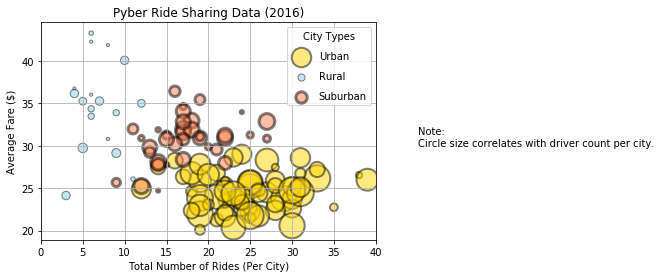

In [20]:
# Obtain the x and y coordinates for each of the three city types
#Driver count per city is essentially a 2D z axis
#put all three city type's data into a dictionary - basically three more dataframes. Is that correct thinking?
urban_cities = total_data[total_data["type"] == "Urban"]
rural_cities = total_data[total_data["type"] == "Rural"]
suburban_cities = total_data[total_data["type"] == "Suburban"]

#Caluclate x ride count y average fare and 2D z driver count for each city type
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

                                                           
# Build the scatter plots for each city types
#Driver count per city is essentially a 2D z axis                                                         
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, c="gold",edgecolor="black", linewidths=2, marker="o", 
            alpha=0.5, label="Urban")

plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count, c="skyblue",edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Rural")

plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count, c="coral",edgecolor="black", linewidths=3, marker="o", 
            alpha=0.5, label="Suburban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="medium",loc="best", title="City Types",labelspacing=1)
                                                           

# Incorporate a text label regarding circle size
plt.text(45, 30, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
#plt.savefig will overwrite unlike the df save to I used above
plt.savefig("scatter.png")

#I realize mine is not exact.  I was having fun playing with opacity and other parameters

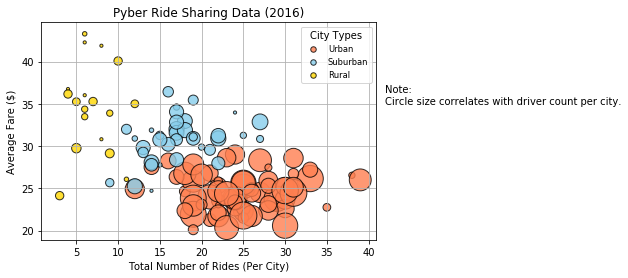

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

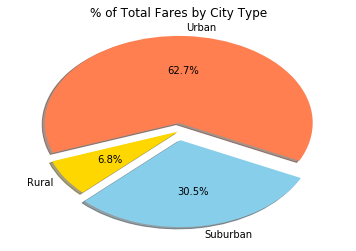

In [34]:
 # Calculate Type Percents
fares_pie = 100 * total_data.groupby(["type"]).sum()["fare"] / total_data["fare"].sum()

# Build Pie Chart
plt.pie(type_pie, labels=["Rural", "Suburban", "Urban"],colors=["gold", "skyblue", "coral"],explode=[0, 0.1, 0.1],autopct='%1.1f%%', 
        shadow=True, startangle=200)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FaresPie.png")



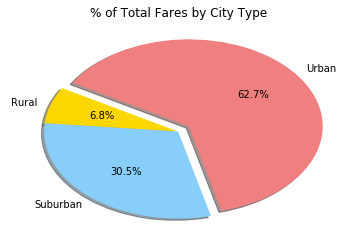

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

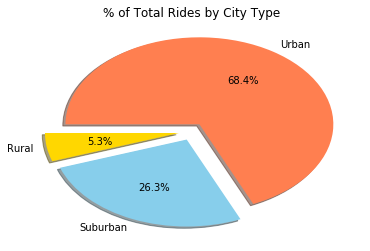

In [36]:
# Calculate Ride Percents
ride_pie = 100 * total_data.groupby(["type"]).count()["ride_id"] / total_data["ride_id"].count()

# Build Pie Chart
plt.pie(ride_pie,labels=["Rural", "Suburban", "Urban"],colors=["gold", "skyblue", "coral"],explode=[0.1, 0.1, 0.1], 
        autopct='%1.1f%%',shadow=True, startangle=180)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("RidePie.png")

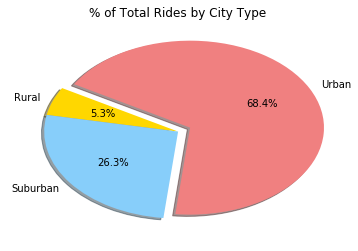

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

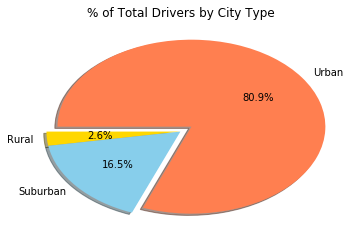

In [35]:
# Calculate Driver Percents
driver_pie = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_pie, 
        labels=["Rural", "Suburban", "Urban"],colors=["gold", "skyblue", "coral"],explode=[0, 0, 0.1],autopct='%1.1f%%', 
        shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversPie.png")


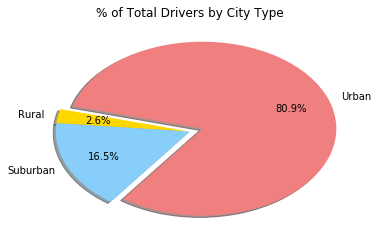

In [6]:
# Show Figure
plt.show()